## import the libraries 

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import numpy as np

# Import libraries for running ANOVA and post-hoc test
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

## Load the data 

In [189]:
df = pd.ExcelFile(r"C:/Users/USER/Downloads/chinese_food.xlsx")

In [190]:
df.sheet_names

['Greenhouse Gas Emission', 'Water Use', 'Land Use']

## Parse the sheets  and create the different dataframes

In [191]:
gas_df = df.parse('Greenhouse Gas Emission')
water_df = df.parse('Water Use')
land_df = df.parse('Land Use')  


In [192]:
gas_df.columns

Index(['Foodcode of Chinese Food Composition Table', 'Food item',
       'Food sub-group', 'Food group',
       'GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)', 'Data source',
       'Language of journal'],
      dtype='object')

## Rename the first and the fifth column

In [193]:
# Rename first column
gas_df = gas_df.rename(columns={gas_df.columns[0]: "Foodcode"})
water_df = water_df.rename(columns={water_df.columns[0]: "Foodcode"})
land_df = land_df.rename(columns={land_df.columns[0]: "Foodcode"})

# Rename 5th column
gas_df = gas_df.rename(columns={gas_df.columns[4]: "co2_released"})
water_df = water_df.rename(columns={water_df.columns[4]: "water_used"})
land_df = land_df.rename(columns={land_df.columns[4]: "land_used"})


## Rename the column “Food group” to “food_group

In [194]:
gas_df = gas_df.rename(columns={gas_df.columns[3]: "food_group"})
water_df = water_df.rename(columns={water_df.columns[3]: "food_group"})
land_df = land_df.rename(columns={land_df.columns[3]: "food_group"})

In [195]:
gas_df

,Foodcode,Food item,Food sub-group,food_group,co2_released,Data source,Language of journal
0,11101,Wheat,wheat,Cereals,0.296835,"Zhang D, Shen J, Zhang F, et al. Carbon footpr...",English
1,11101,Wheat,wheat,Cereals,0.301455,"Zhang G, Wang X, Zhang L, et al. Carbon and wa...",English
2,11101,Wheat,wheat,Cereals,0.331485,"卫凯平,武慧君,黄莉,王晓旭,陈晓芳.农业生产系统氮磷环境影响分析以安徽省为例[J].农业环...",Chinese
3,11101,Wheat,wheat,Cereals,0.340473,宁夏回族自治区平罗县主要农作物碳足迹研究,Chinese
4,11101,Wheat,wheat,Cereals,0.440055,"Wang W, Guo L, Li Y, et al. Greenhouse gas int...",English
...,...,...,...,...,...,...,...
2056,91306,Crock Pot Chicken Soup (Soup),chicken,Poultry,6.840000,refer to the average of food sub-group: chicke...,NaN
2057,91307,Chicken floss,chicken,Poultry,6.840000,refer to the average of food sub-group: chicke...,NaN
2058,91308,Braised chicken (spicy boneless),chicken,Poultry,6.840000,refer to the average of food sub-group: chicke...,NaN
2059,91309,roast chicken,chicken,Poultry,6.840000,refer to the average of food sub-group: chicke...,NaN


## checking missing values

In [196]:
gas_df.isnull().sum(), water_df.isnull().sum(), land_df.isnull().sum()

(Foodcode                  0
 Food item                 0
 Food sub-group            0
 food_group                0
 co2_released              0
 Data source               0
 Language of journal    1021
 dtype: int64,
 Foodcode                  0
 Food item                 1
 Food sub-group            0
 food_group                0
 water_used                0
 Data source               0
 Language of journal    1085
 dtype: int64,
 Foodcode                 0
 Food item                0
 Food sub-group           0
 food_group               0
 land_used                0
 Data source              0
 Language of journal    786
 dtype: int64)

## Droping missing values 

In [197]:
gas_df = gas_df.dropna()
water_df = water_df.dropna()
land_df = land_df.dropna()

## checking dublicates 

In [198]:
gas_df.duplicated().sum(), water_df.duplicated().sum(), land_df.duplicated().sum()

(np.int64(30), np.int64(48), np.int64(1))

## droping missing values 

In [199]:
gas_df = gas_df.drop_duplicates()
water_df = water_df.drop_duplicates()
land_df = land_df.drop_duplicates()


## Check the group size in “food_group”.

In [200]:
gas_counts = gas_df['food_group'].value_counts()
water_counts = water_df['food_group'].value_counts()
land_counts = land_df['food_group'].value_counts()

side_by_side = pd.concat(
    [gas_counts, water_counts, land_counts], 
    axis=1,
    keys=['gas', 'water', 'land']
)
side_by_side


,gas,water,land
food_group,,,
Cereals,489,444,32.0
Meat,140,61,11.0
Vegetables,133,101,8.0
Dairy,65,14,12.0
Fruit,55,47,1.0
Poultry,45,19,4.0
Eggs,23,16,2.0
Legumes,15,49,1.0
Aquatic products,13,41,10.0


## Plot a histogram for each of the environmental impact variables 

<Axes: xlabel='co2_released', ylabel='Count'>

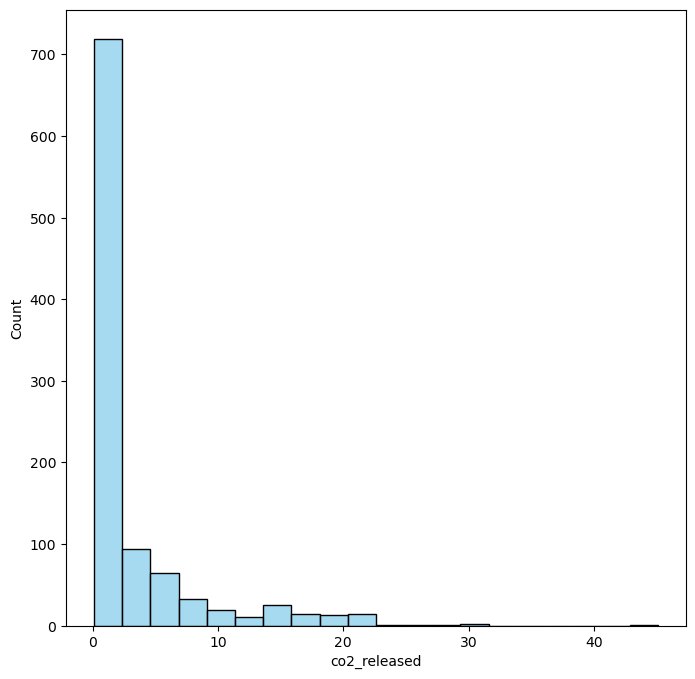

In [215]:
plt.figure(figsize=(8, 8))
sns.histplot(gas_df['co2_released'], bins=20, color='skyblue', label='A')

## log of variables 

<Axes: xlabel='co2_released', ylabel='Count'>

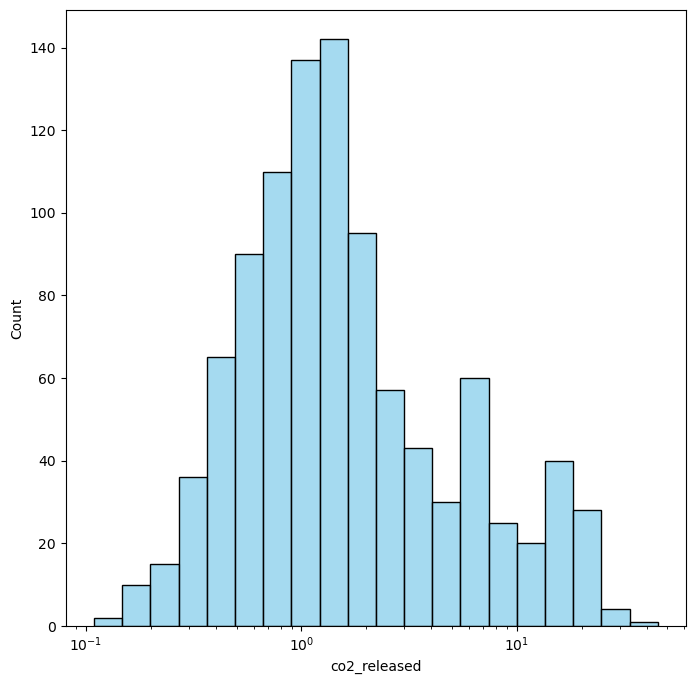

In [216]:
plt.figure(figsize=(8, 8))
sns.histplot(gas_df['co2_released'], bins=20, color='skyblue', label='A',log_scale=True)

<Axes: xlabel='water_used', ylabel='Count'>

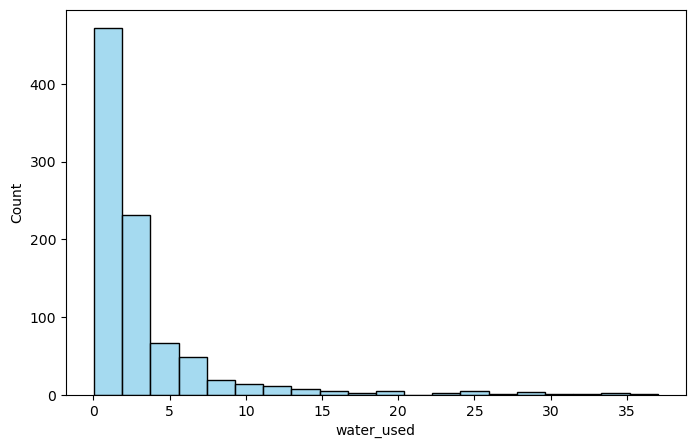

In [217]:
plt.figure(figsize=(8, 5))
sns.histplot(water_df['water_used'], bins=20, color='skyblue', label='A')

<Axes: xlabel='water_used', ylabel='Count'>

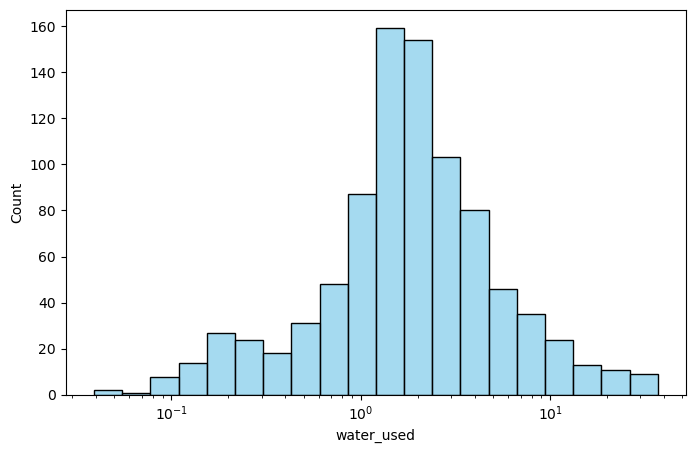

In [219]:
plt.figure(figsize=(8, 5))
sns.histplot(water_df['water_used'], bins=20, color='skyblue', label='A',log_scale=True)

<Axes: xlabel='land_used', ylabel='Count'>

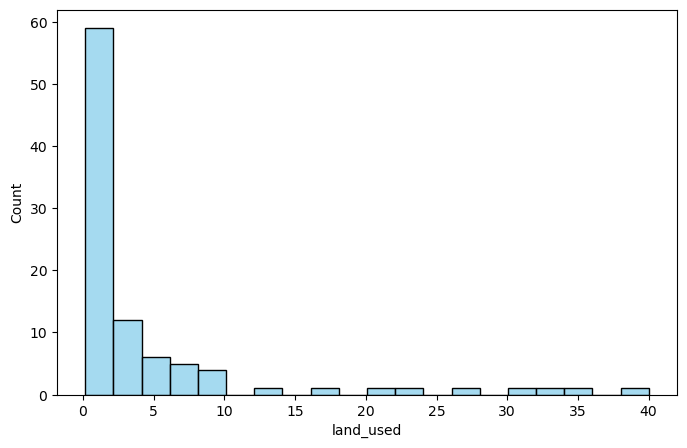

In [220]:
plt.figure(figsize=(8, 5))
sns.histplot(land_df['land_used'], bins=20, color='skyblue', label='A')

<Axes: xlabel='land_used', ylabel='Count'>

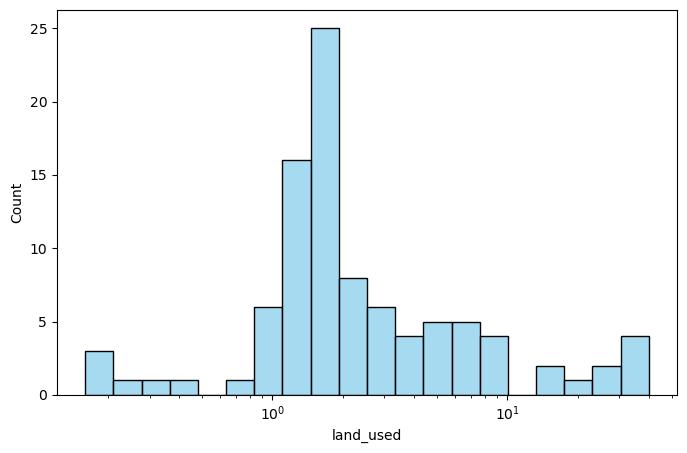

In [222]:
plt.figure(figsize=(8, 5))
sns.histplot(land_df['land_used'], bins=20, color='skyblue', label='A',log_scale=True)

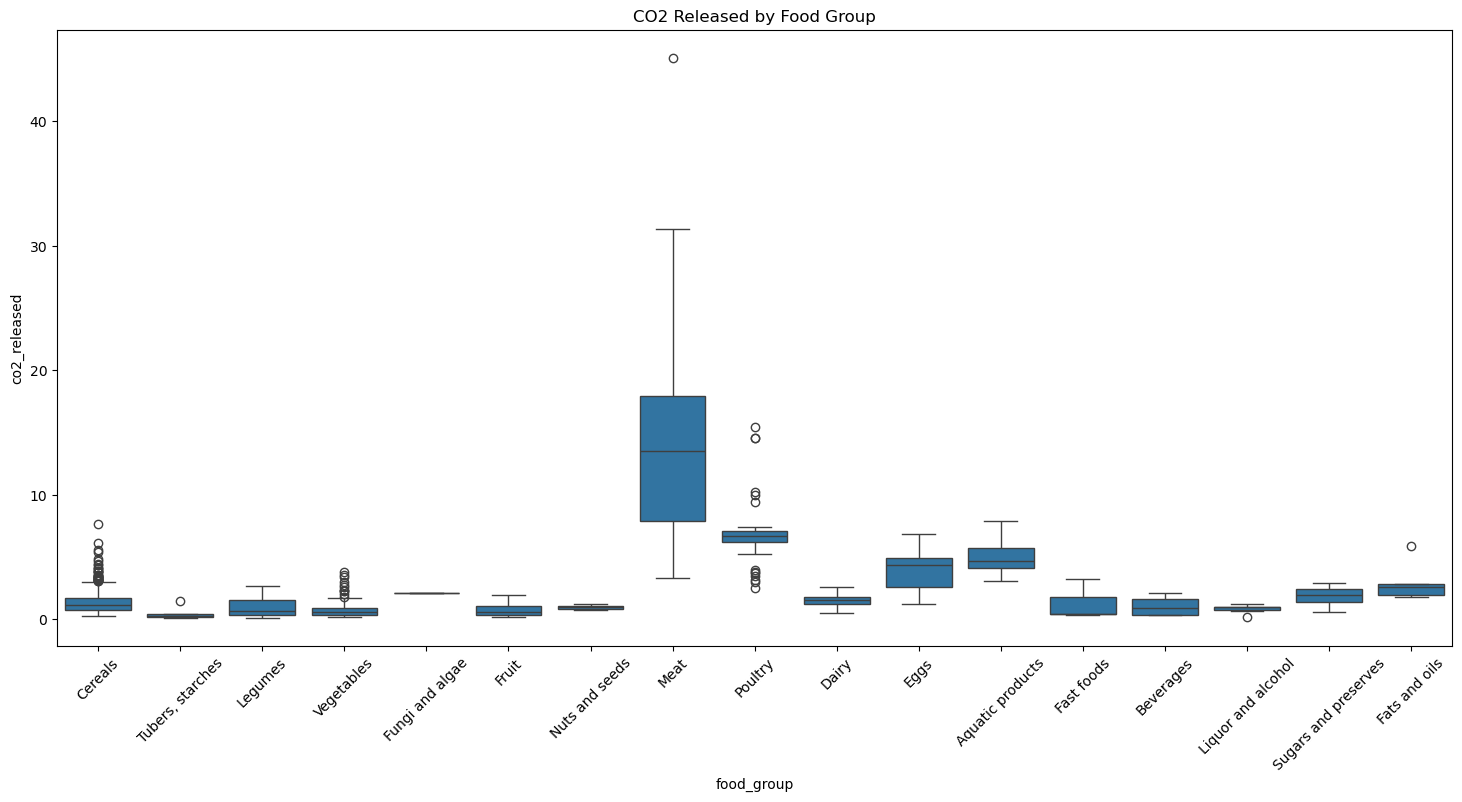

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(x="food_group", y="co2_released", data=gas_df)
plt.title("CO2 Released by Food Group")
plt.xticks(rotation=45)
plt.show()

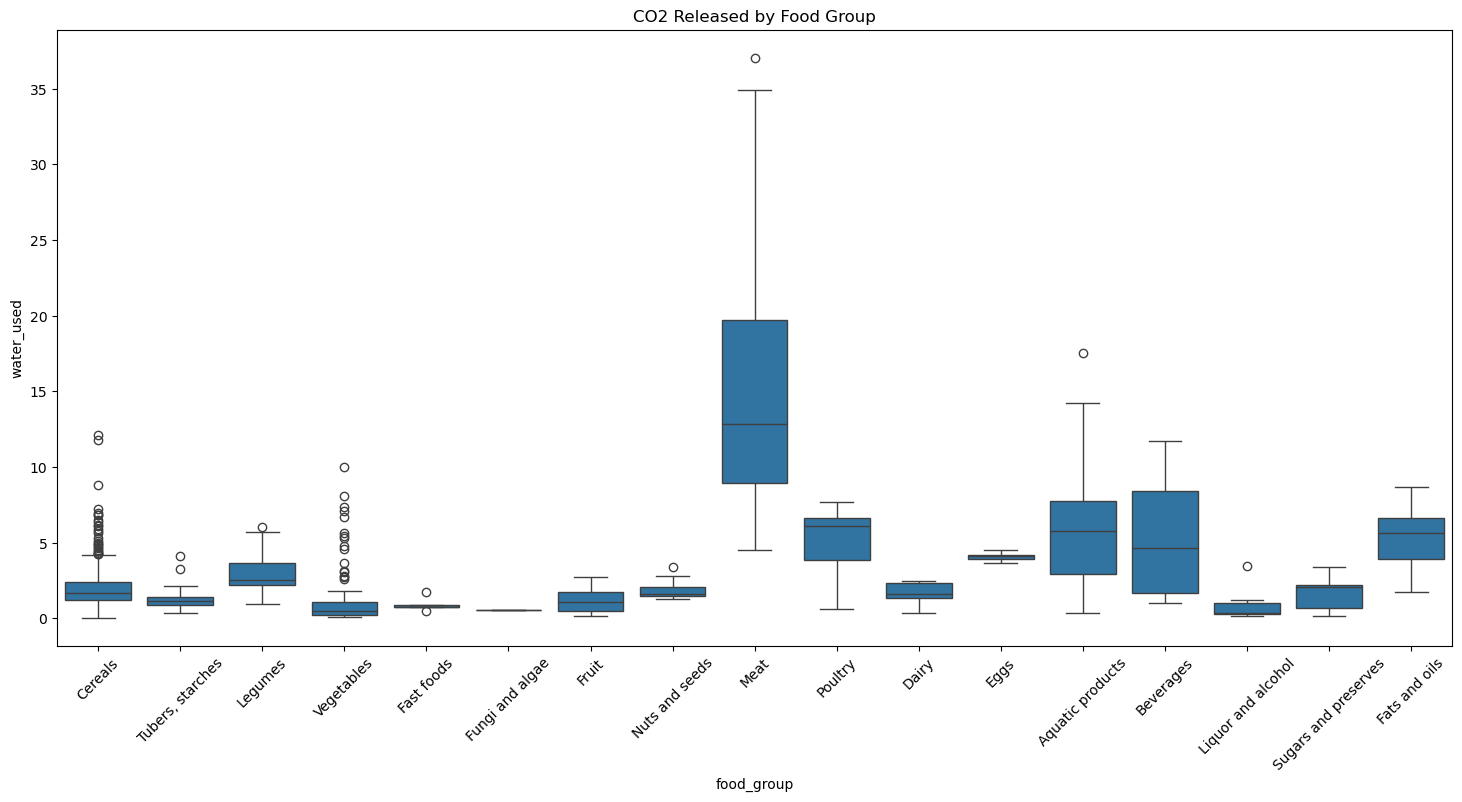

In [240]:
plt.figure(figsize=(18, 8))
sns.boxplot(x="food_group", y="water_used", data=water_df)
plt.title("CO2 Released by Food Group")
plt.xticks(rotation=45)
plt.show()

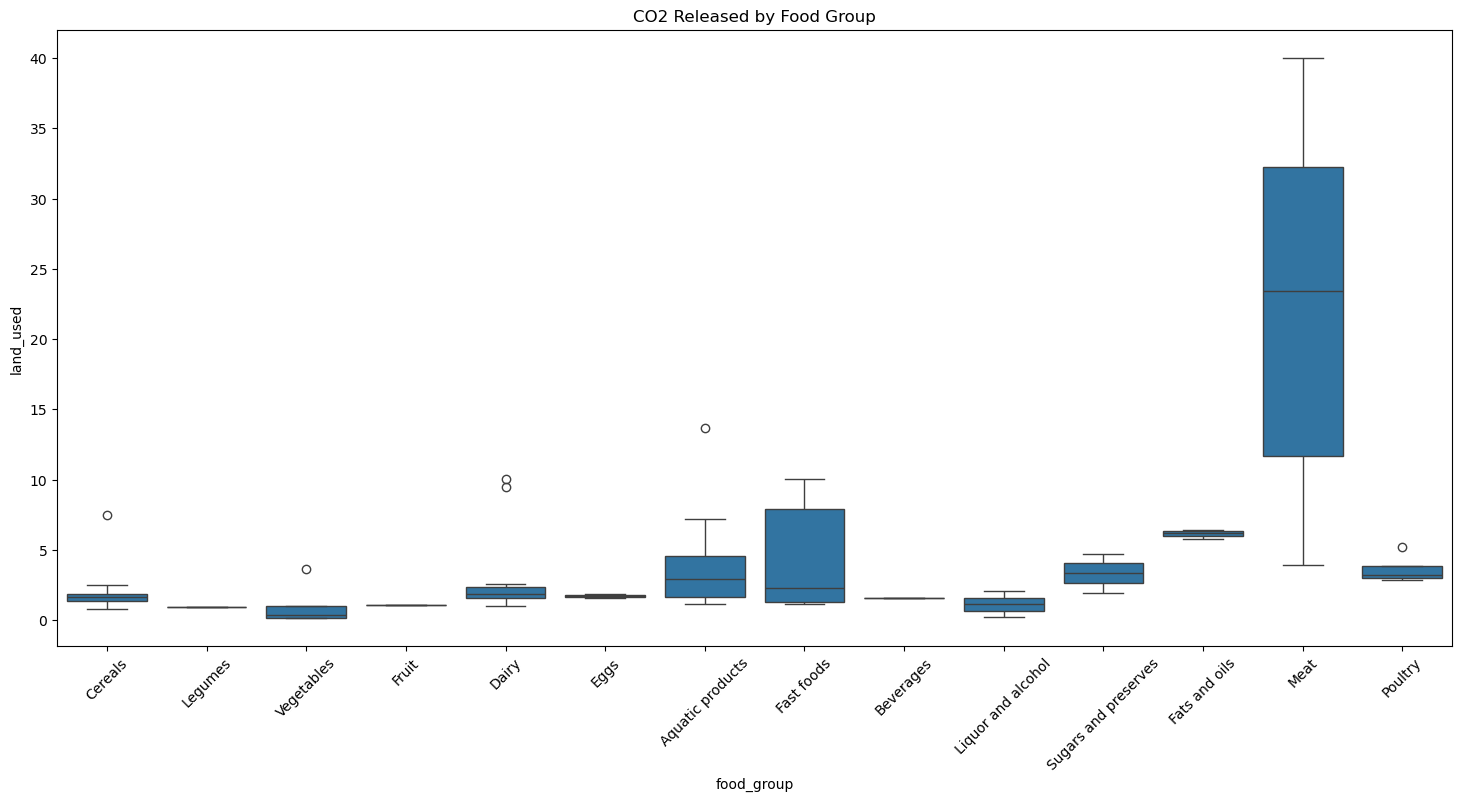

In [241]:
plt.figure(figsize=(18, 8))
sns.boxplot(x="food_group", y="land_used", data=land_df)
plt.title("CO2 Released by Food Group")
plt.xticks(rotation=45)
plt.show()

In [264]:
model1 = ols('co2_released ~ C(food_group)', data=gas_df).fit()
anova_result = anova_lm(model1, typ=2)
print(anova_result)

                     sum_sq     df           F         PR(>F)
C(food_group)  18831.528358   16.0  164.308026  1.560338e-265
Residual        7113.053200  993.0         NaN            NaN


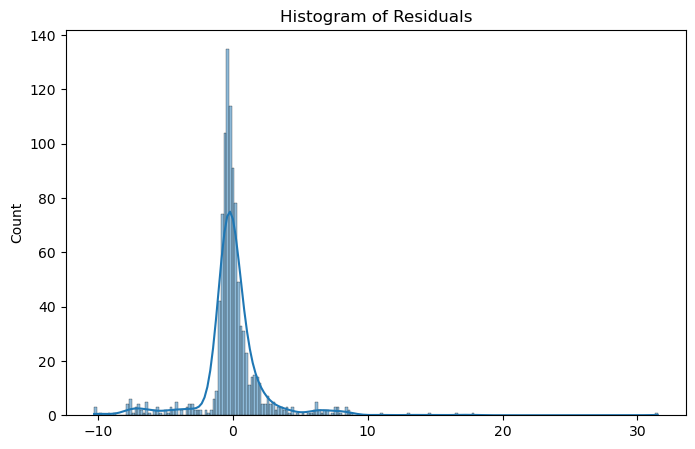

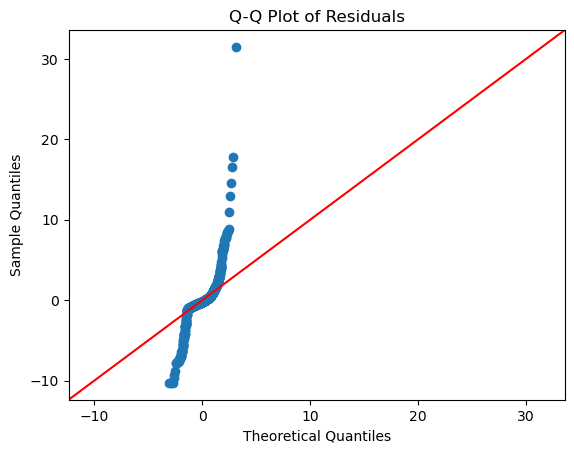

In [271]:
residuals = model1.resid
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [266]:
model2 = ols('water_used ~ C(food_group)', data=water_df).fit()
anova_result = anova_lm(model2, typ=2)
print(anova_result)

                     sum_sq     df          F         PR(>F)
C(food_group)  11381.710612   16.0  94.218483  8.829176e-178
Residual        6621.418548  877.0        NaN            NaN


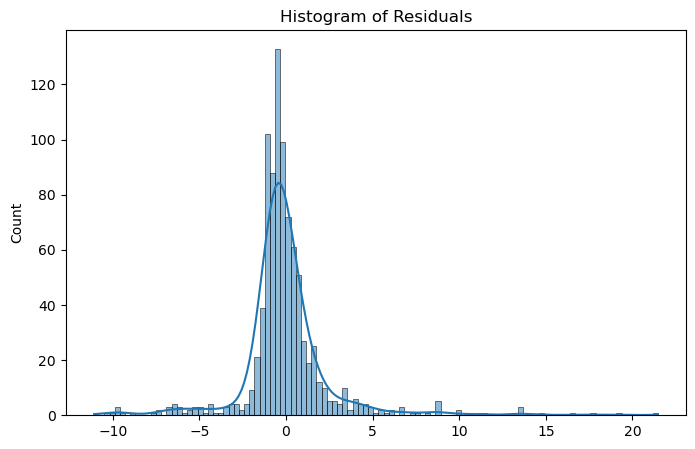

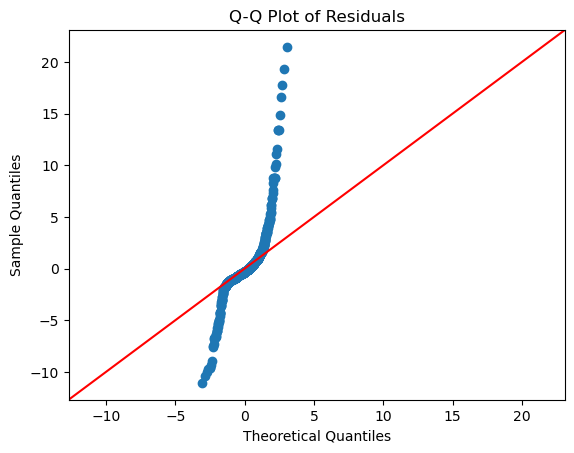

In [272]:
residuals = model2.resid
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [273]:
model3 = ols('land_used ~ C(food_group)', data=land_df).fit()
anova_result = anova_lm(model3, typ=2)
print(anova_result)

                    sum_sq    df          F        PR(>F)
C(food_group)  3861.687441  13.0  12.175594  3.591674e-14
Residual       1976.189685  81.0        NaN           NaN


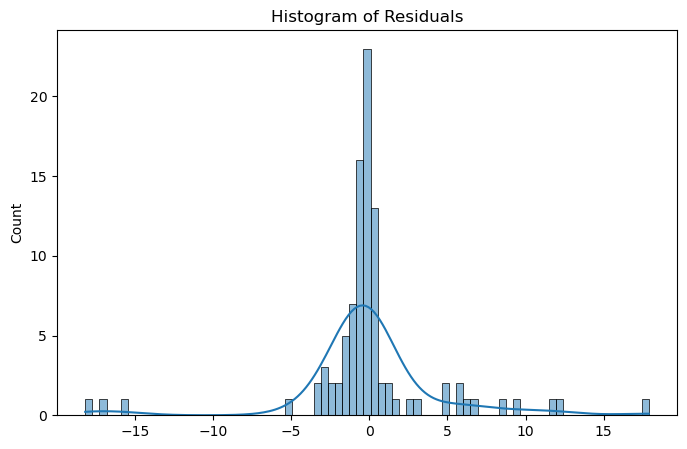

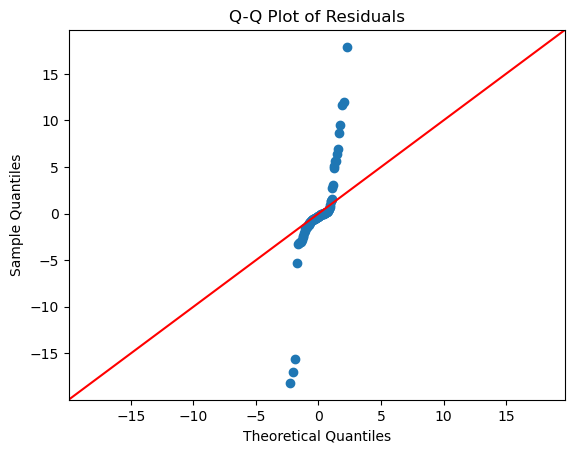

In [274]:
residuals = model3.resid
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()
